## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Step 2: Load Dataset

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 3: Data Overview

In [5]:
print(df.info())
print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## Step 4: Feature Selection

In [6]:
X = df.drop("Outcome", axis=1)

y = df["Outcome"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 8)
Shape of y: (768,)


## Step 5: Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (614, 8)
Testing set: (154, 8)


## Step 6: Build Decision Tree Model

In [8]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

## Step 7: Evaluate Both Models

In [9]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

print("Accuracy using Gini Index:", accuracy_score(y_test, y_pred_gini))
print("Accuracy using Entropy:", accuracy_score(y_test, y_pred_entropy))


Accuracy using Gini Index: 0.7467532467532467
Accuracy using Entropy: 0.7207792207792207


## Step 8: Visualize Decision Tree

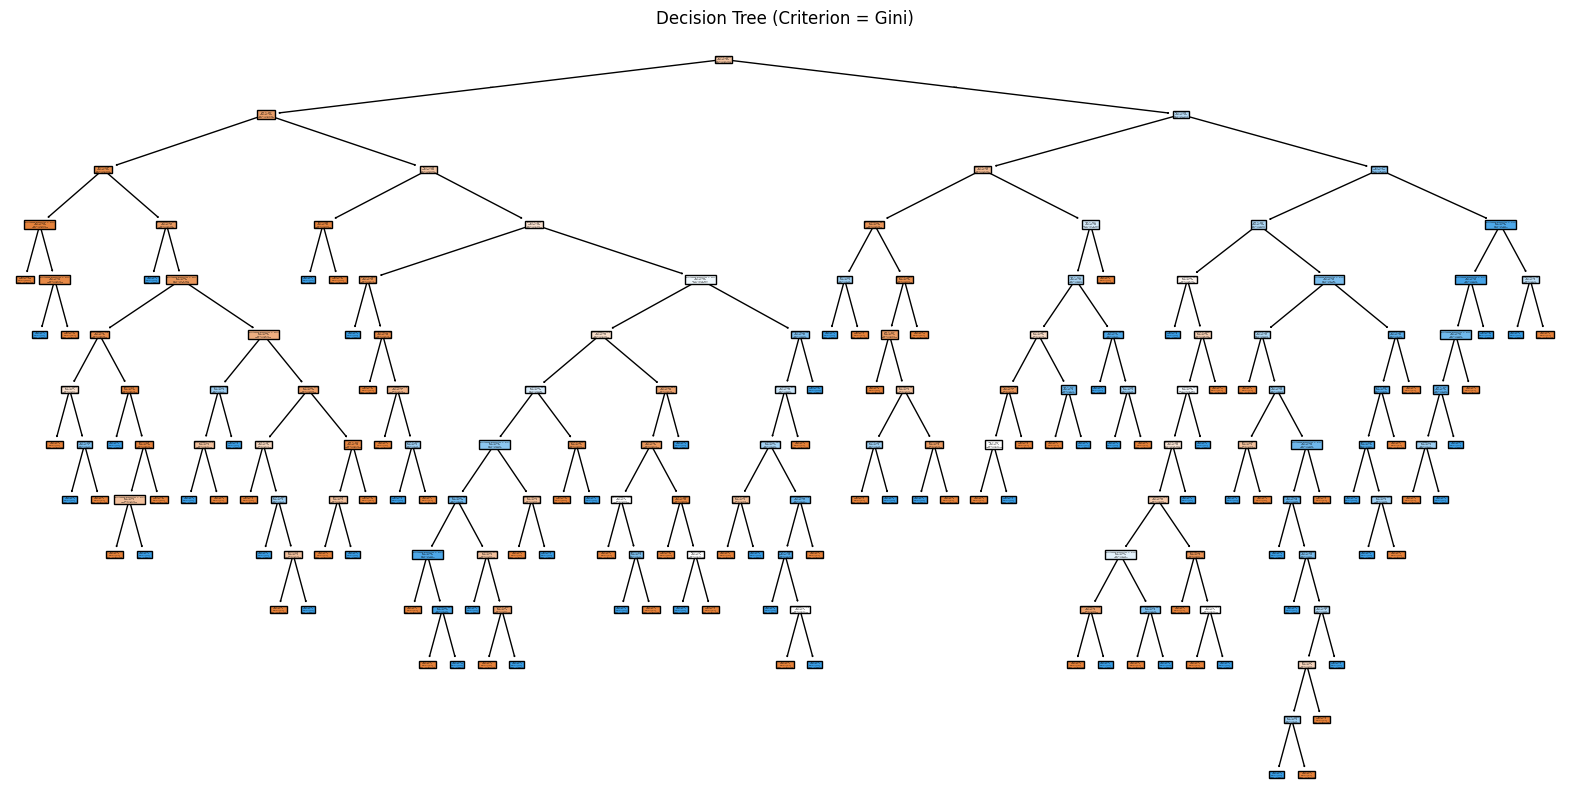

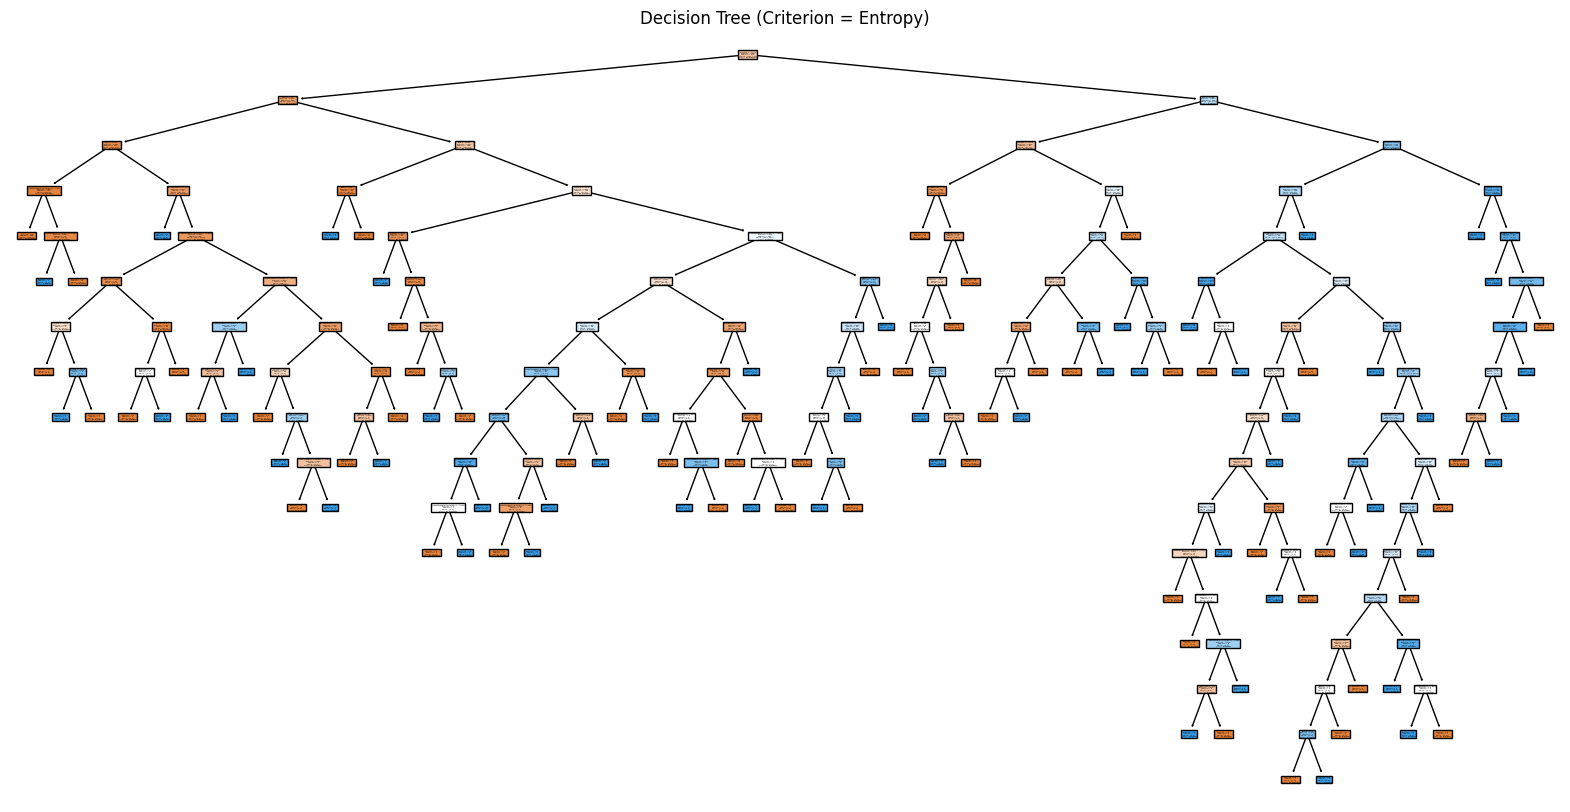

In [10]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['No Diabetes','Diabetes'])
plt.title("Decision Tree (Criterion = Gini)")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No Diabetes','Diabetes'])
plt.title("Decision Tree (Criterion = Entropy)")
plt.show()


## Step 9: View Decision Rules

In [11]:
tree_rules = export_text(clf_gini, feature_names=list(X.columns))
print(tree_rules)


|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 30.95
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.69
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- DiabetesPedigreeFunction >  0.69
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- BloodPressure <= 37.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  37.00
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- SkinThickness <= 8.50
|   |   |   |   |   |   |--- Glucose <= 109.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Glucose >  109.50
|   |   |   |   |   |   |   |--- Glucose <= 123.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Glucose >  123.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SkinThickness >  8.50
|   |   |

## Step 10: Calculate Entropy, Information Gain, and Gini Index (Manually for Root Node)

In [12]:
def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

def gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

parent_entropy = entropy(y_train)
parent_gini = gini(y_train)
print("Parent Entropy:", parent_entropy)
print("Parent Gini:", parent_gini)

threshold = X_train['Glucose'].median()
left = y_train[X_train['Glucose'] <= threshold]
right = y_train[X_train['Glucose'] > threshold]

weighted_entropy = (len(left)/len(y_train))*entropy(left) + (len(right)/len(y_train))*entropy(right)
information_gain = parent_entropy - weighted_entropy

weighted_gini = (len(left)/len(y_train))*gini(left) + (len(right)/len(y_train))*gini(right)

print(f"Information Gain for 'Glucose': {information_gain:.4f}")
print(f"Gini Index after split: {weighted_gini:.4f}")


Parent Entropy: 0.9312740341054782
Parent Gini: 0.45312417107873826
Information Gain for 'Glucose': 0.1053
Gini Index after split: 0.3893
